In [20]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

from fenics import *

from uqdamage.fem.DamageBase import load_data
from uqdamage.fem.postprocessing.DamageAveraging import angle_averaged_damage

from scipy import signal

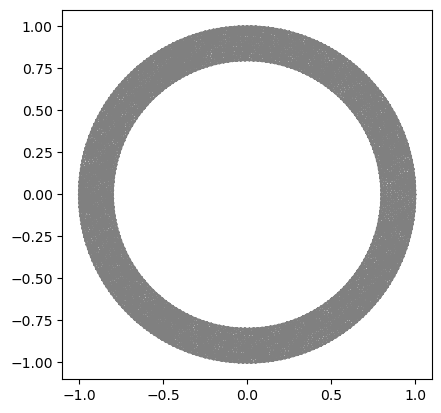

In [2]:
mesh = Mesh()
with XDMFFile(mesh.mpi_comm(), "_mesh.xdmf") as fin:
    fin.read(mesh)
    
plot(mesh)
plt.show()

In [3]:
Vd = FunctionSpace(mesh, "DG", 0)
Vσ = TensorFunctionSpace(mesh, "DG", 0)

time, damage = load_data(mesh, "ring_data.h5", Vd, "Damage")
_, stress = load_data(mesh, "ring_data.h5", Vσ, "Stress")
_, strain = load_data(mesh, "ring_data.h5", Vσ, "Strain")

In [4]:
total_elastic_energy = [assemble(inner(ε, σ) * dx) for (ε, σ) in zip(strain, stress)]

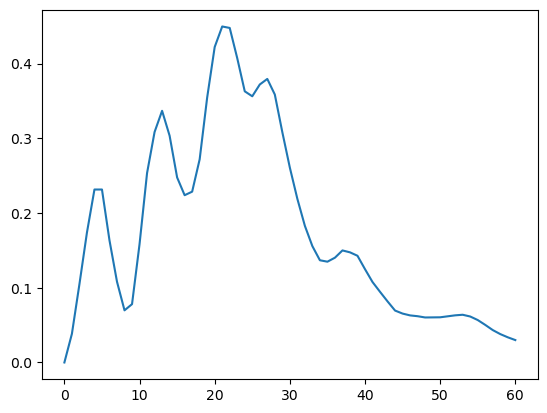

In [5]:
plt.plot(total_elastic_energy)
plt.show()

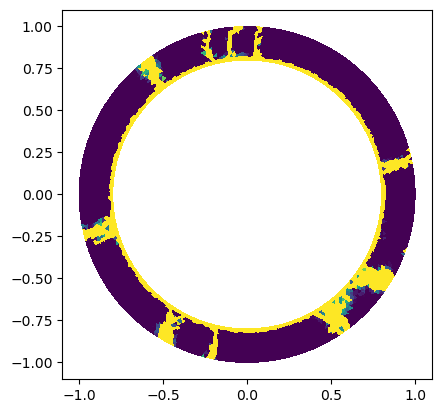

In [6]:
final_damage = damage[-1]
plot(final_damage)
plt.show()

In [8]:
θ = np.linspace(0, 2 * np.pi, 100)
ω = angle_averaged_damage(final_damage, θ)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


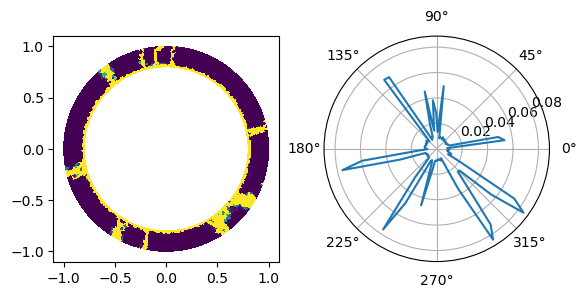

In [17]:
fig = plt.figure()
ax = fig.add_subplot(121)
plot(final_damage)
ax = fig.add_subplot(122, projection="polar")
ax.plot(θ, ω)
plt.show()

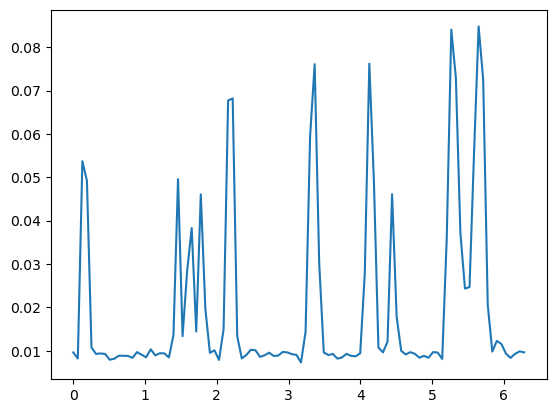

In [19]:
plt.plot(θ, ω)
plt.show()

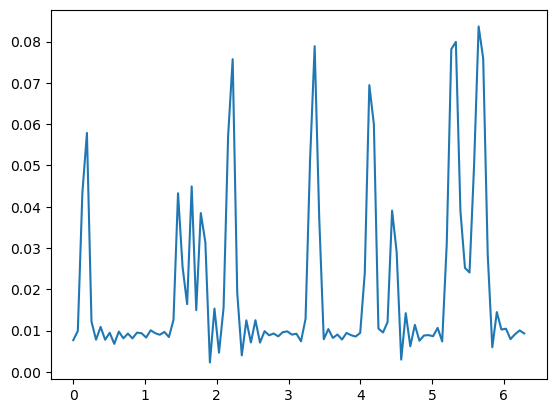

In [31]:
ω_smooth = signal.sosfilt(signal.butter(2, 0.9, output="sos"), ω)

plt.plot(θ, ω_smooth)
plt.show()

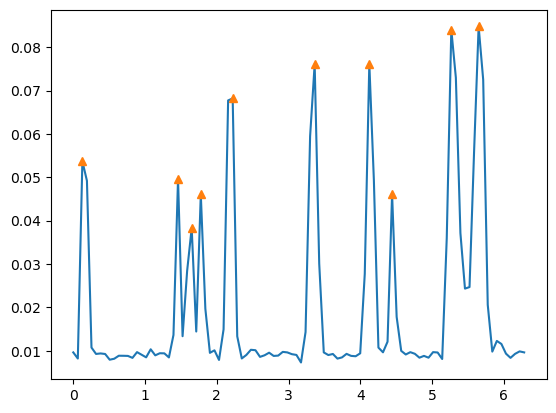

In [40]:
peaks, props = signal.find_peaks(ω, prominence=(1e-2, None))

plt.plot(θ, ω)
plt.plot(θ[peaks], ω[peaks], "^")
plt.show()

In [35]:
signal.find_peaks?